### dataset: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


### directory set

In [13]:
base_dir="archive (1)"
train_dir=os.path.join(base_dir, "seg_train\seg_train")
test_dir=os.path.join(base_dir,"seg_test\seg_test")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Al-Momen Reyad\AppData\Local\Temp\ipykernel_32156\1412732078.py:2: SyntaxWarning: invalid escape sequence '\s'
  train_dir=os.path.join(base_dir, "seg_train\seg_train")
C:\Users\Al-Momen Reyad\AppData\Local\Temp\ipykernel_32156\1412732078.py:3: SyntaxWarning: invalid escape sequence '\s'
  test_dir=os.path.join(base_dir,"seg_test\seg_test")


### constants part

In [14]:
IMG_HEIGHT=224
IMG_WIDTH=224
BATCH_SIZE=32
EPOCHS=10

### image preprocessing

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size= BATCH_SIZE, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size= BATCH_SIZE, class_mode="categorical", shuffle=False
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### model design

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

d:\Reyad's Projects\Test Project\CNN_Image_classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [17]:
history = model.fit(train_generator, epochs=EPOCHS)

Epoch 1/10


d:\Reyad's Projects\Test Project\CNN_Image_classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 66s 150ms/step - accuracy: 0.5556 - loss: 1.1372
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 67s 151ms/step - accuracy: 0.6928 - loss: 0.8275
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 67s 153ms/step - accuracy: 0.7671 - loss: 0.6546
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 67s 152ms/step - accuracy: 0.8089 - loss: 0.5338
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 66s 151ms/step - accuracy: 0.8439 - loss: 0.4406
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 66s 150ms/step - accuracy: 0.8755 - loss: 0.3466
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 66s 150ms/step - accuracy: 0.9011 - loss: 0.2813
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 67s 152ms/step - accuracy: 0.9169 - loss: 0.2294
Epoch 9/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 66s 151ms/step - accuracy: 0.9352 - loss: 0.1854
Epoch 10/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 66s 150ms/step - accuracy: 0.9430 - loss: 0.1640


### evaluate model

In [22]:
test_loss, test_acc = model.evaluate(test_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8037 - loss: 0.7079


In [23]:
print(f"Test accuracy: {test_acc} and Test loss: {test_loss}")

Test accuracy: 0.8036666512489319 and Test loss: 0.7078818082809448


### graph

In [28]:
true_labels=test_generator.classes
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
pred_prob = model.predict(test_generator)
pred_labels=np.argmax(pred_prob,axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step


In [31]:
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

   buildings       0.80      0.76      0.78       437
      forest       0.97      0.90      0.93       474
     glacier       0.78      0.75      0.77       553
    mountain       0.71      0.79      0.75       525
         sea       0.81      0.76      0.78       510
      street       0.80      0.86      0.83       501

    accuracy                           0.80      3000
   macro avg       0.81      0.80      0.81      3000
weighted avg       0.81      0.80      0.80      3000



### confusion matrix

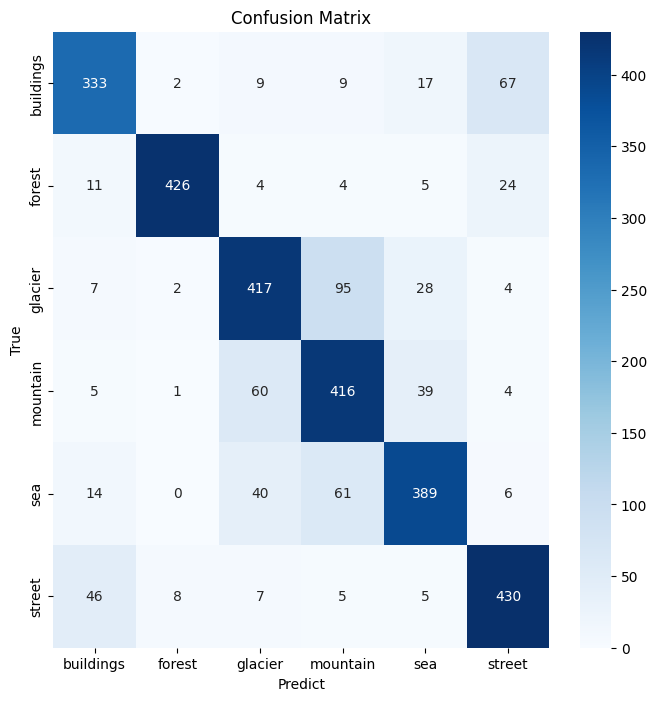

In [32]:
cm=confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()